In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../csv/resumen_nacional.csv")

In [3]:
data.tail()

,dia,confirmados,muertes
67,05/13/2020,34381,346
68,05/14/2020,37040,368
69,05/15/2020,39542,394
70,05/16/2020,41428,421
71,05/17/2020,43781,450


In [4]:
data.describe()

,confirmados,muertes
count,72.000000,72.000000
mean,10662.527778,121.180556
std,11602.439214,130.095342
min,7.000000,0.000000
25%,1087.000000,2.750000
50%,7070.000000,76.500000
75%,15169.500000,218.750000
max,43781.000000,450.000000


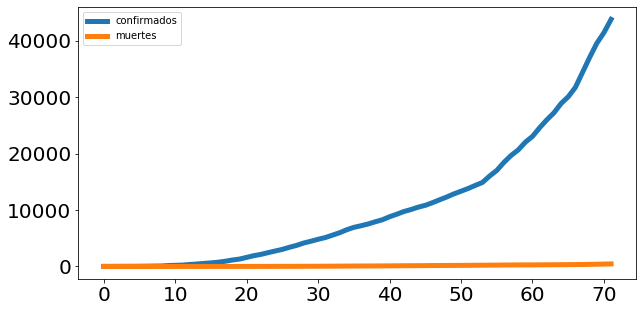

In [5]:
#data.plot(kind="line", x="dia" , y= ["confirmados", "muertes"], figsize = (10,5) )
data.plot(figsize=(10,5), linewidth=5, fontsize=20 )

In [6]:
#plt.figure(figsize=(10, 5))

#plt.subplot(121)
#data.plot( x="dia", y="confirmados" )
#plt.title('Funcion 1')

#plt.subplot(122)
##data.plot( x="dia", y="muertes" )
#plt.title('Funcion 2')

#plt.show()


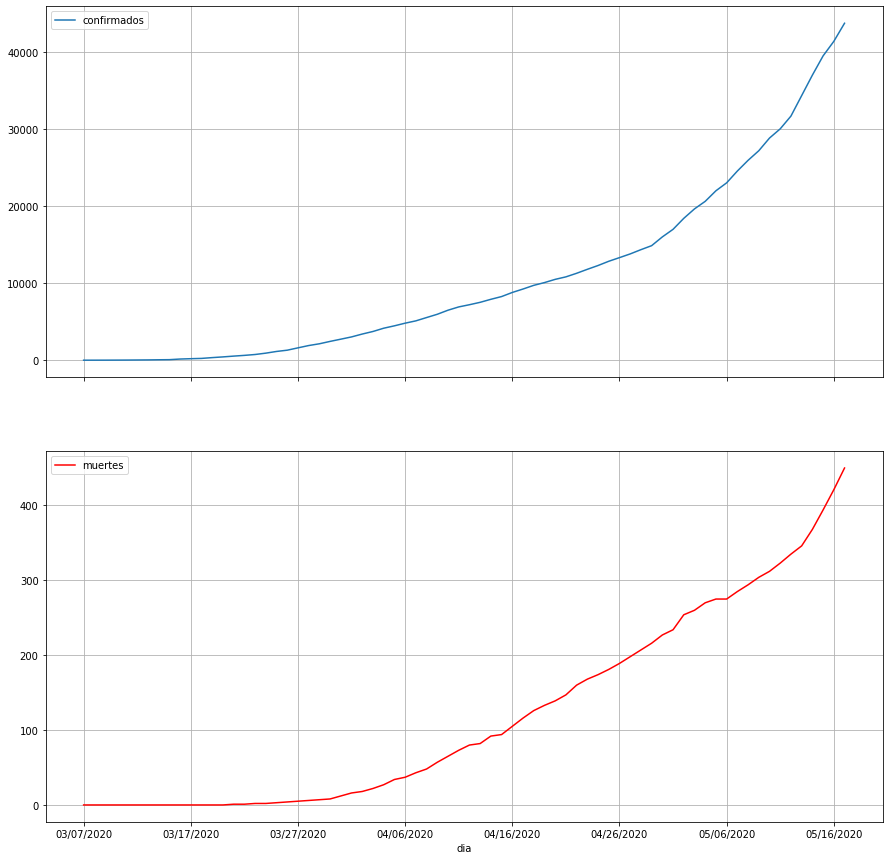

In [7]:
figure , axes = plt.subplots(2, sharex=True)
data.plot(x="dia", y="confirmados", ax=axes[0], figsize=(15,15) , grid=True)
data.plot(x="dia", y="muertes" , ax=axes[1], figsize=(15,15), color="r" , grid=True)